In [6]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('/Users/Samet/Desktop/hw/heart_statlog_cleveland_hungary_final.csv')
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [39]:
data.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

no need encoding

In [8]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


<AxesSubplot: >

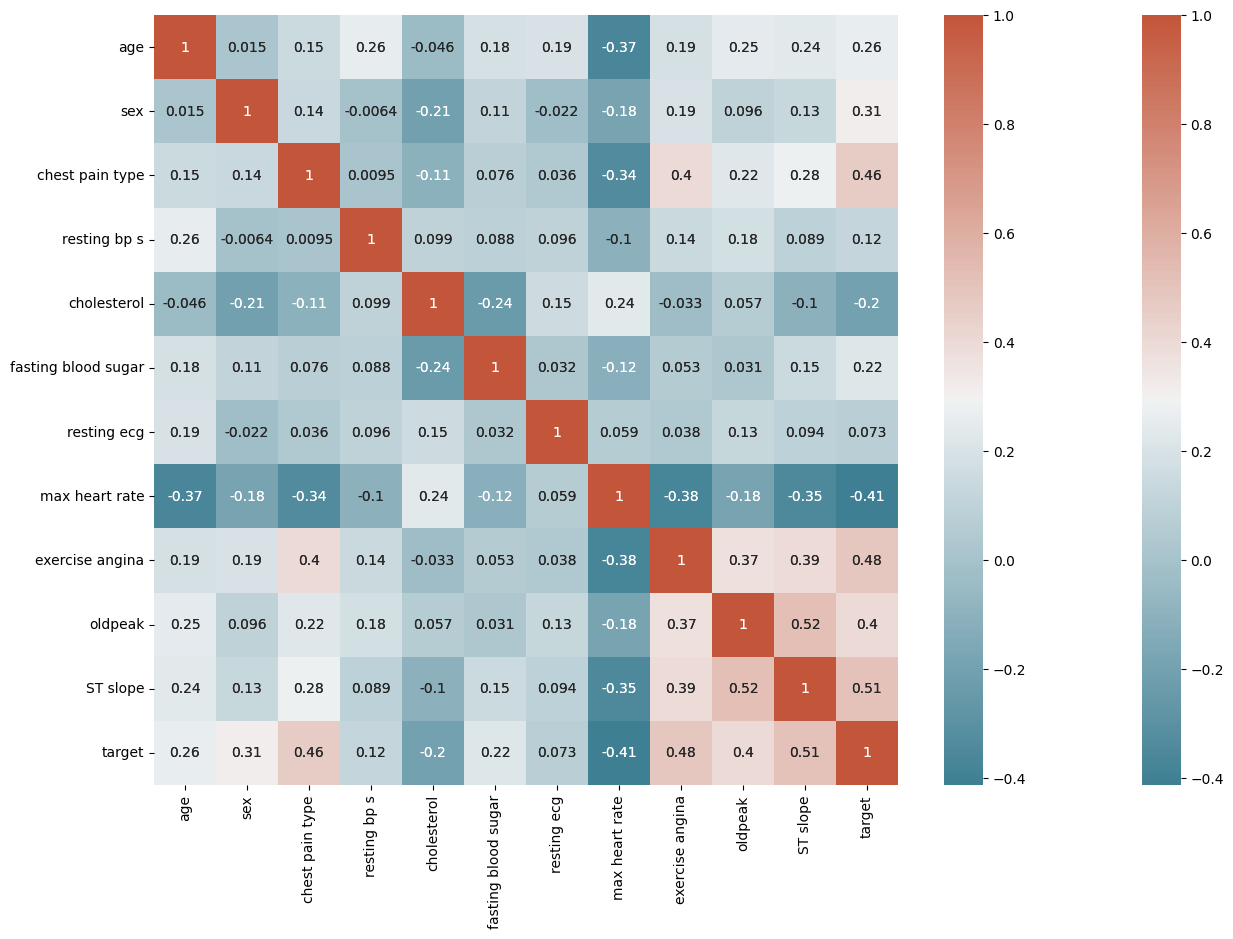

In [9]:
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

#### Negative correlations with "target":
cholesterol and max heart rate <br>
Note: The rest is positively correlated.

In [20]:
have_disease = data[data["target"]==1] 
have_disease

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1,49,0,3,160,180,0,0,156,0,1.0,2,1
3,48,0,4,138,214,0,0,108,1,1.5,2,1
8,37,1,4,140,207,0,0,130,1,1.5,2,1
11,58,1,2,136,164,0,1,99,1,2.0,2,1
13,49,1,4,140,234,0,0,140,1,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1184,57,0,4,140,241,0,0,123,1,0.2,2,1
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1


### Age analysis

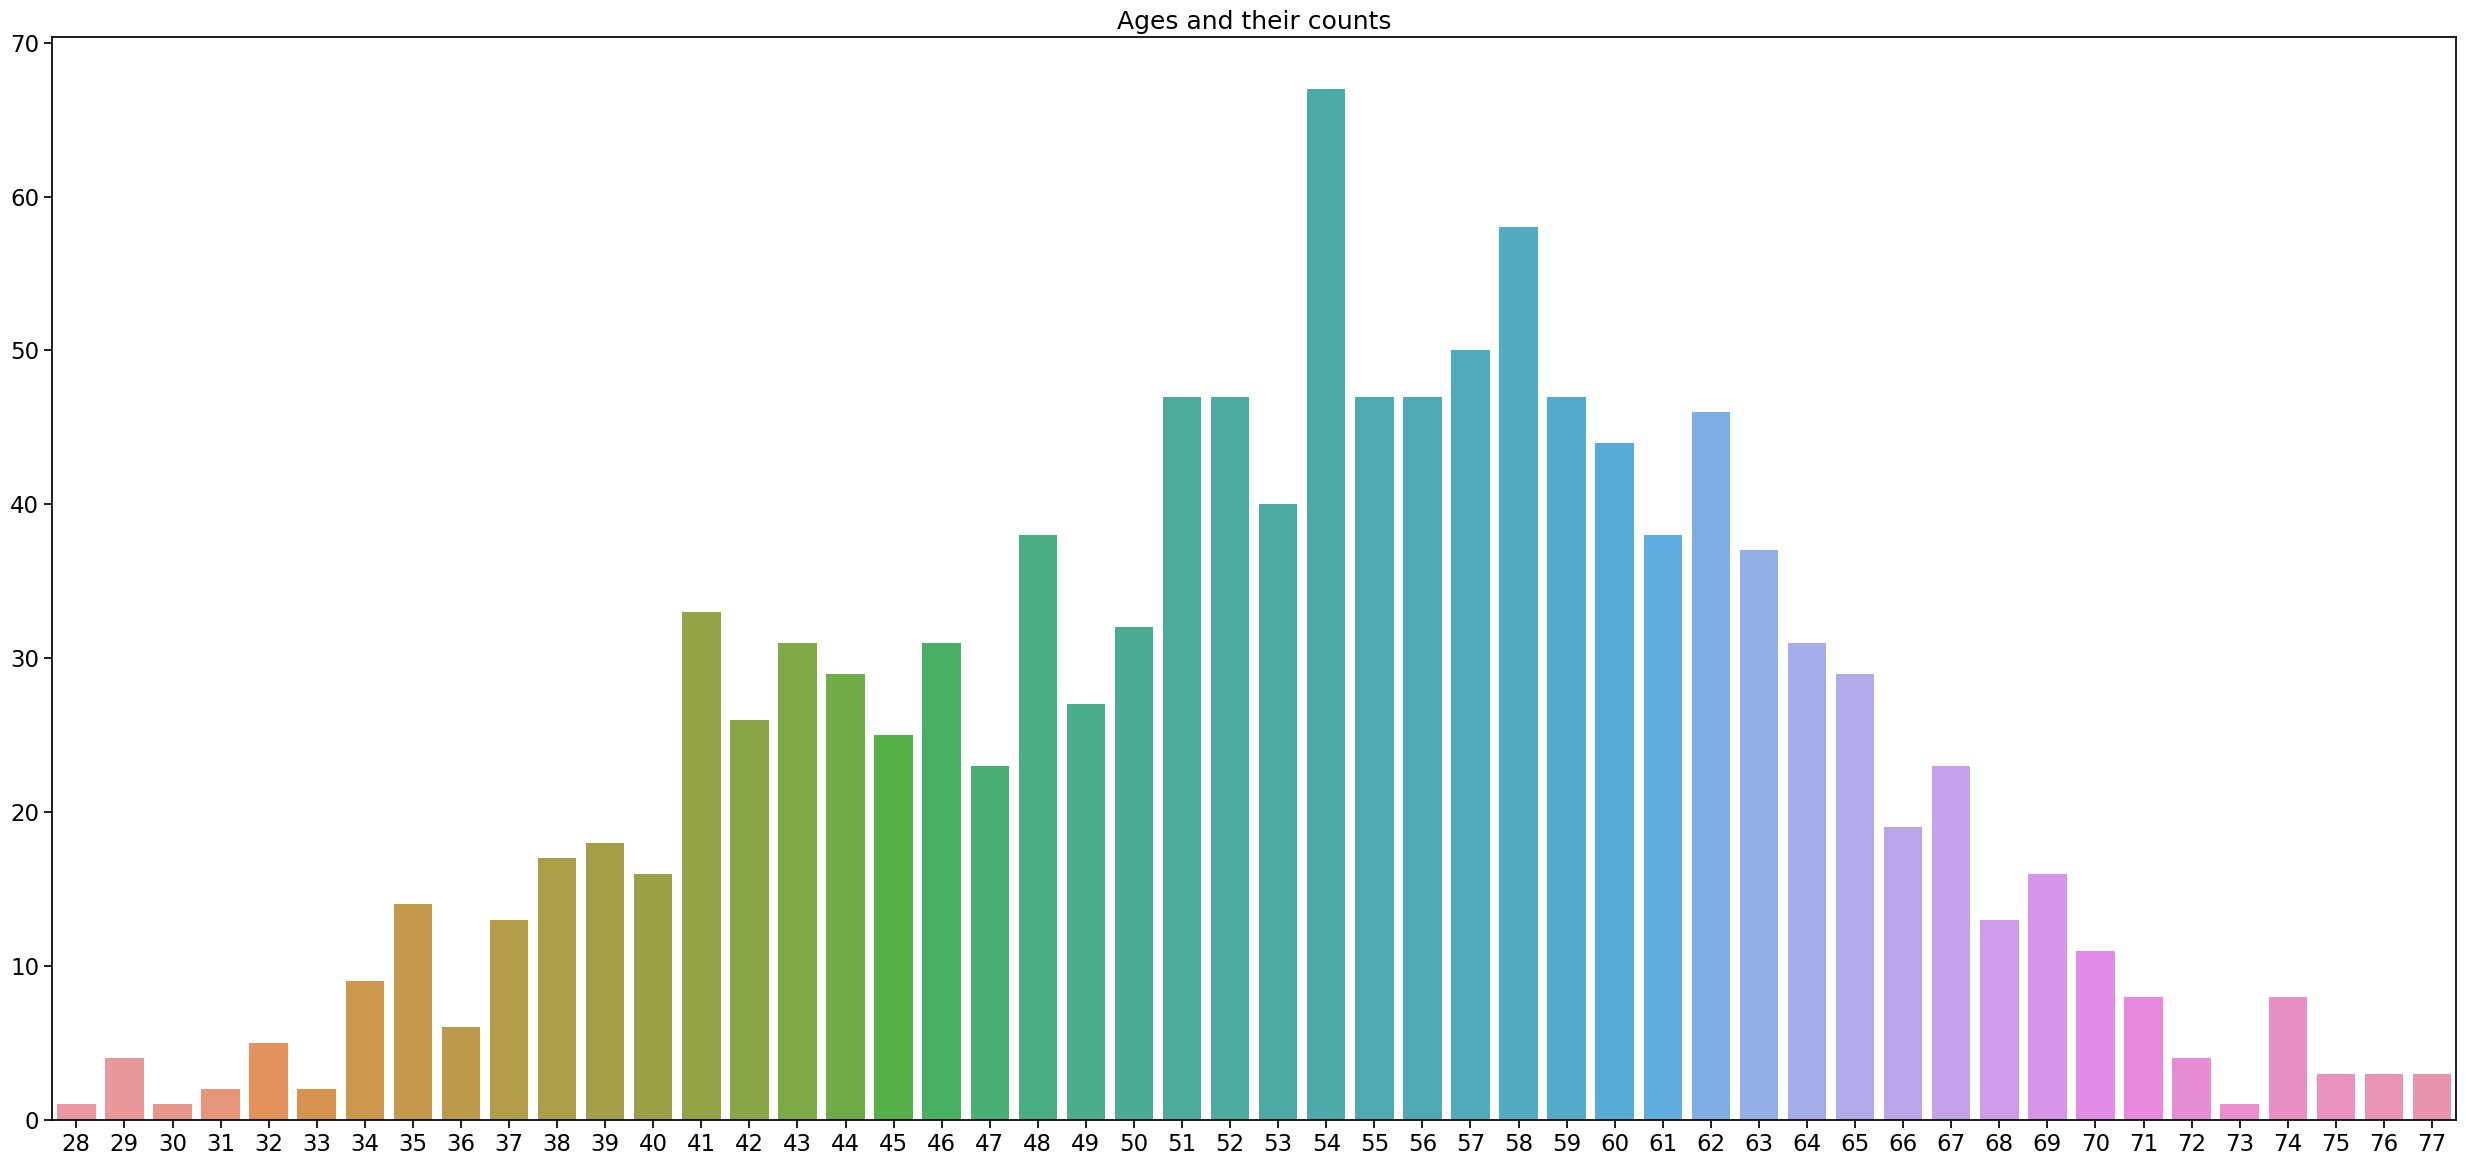

In [26]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.age.value_counts().index,y=data.age.value_counts().values)
plt.title("Ages and their counts")
plt.tight_layout()

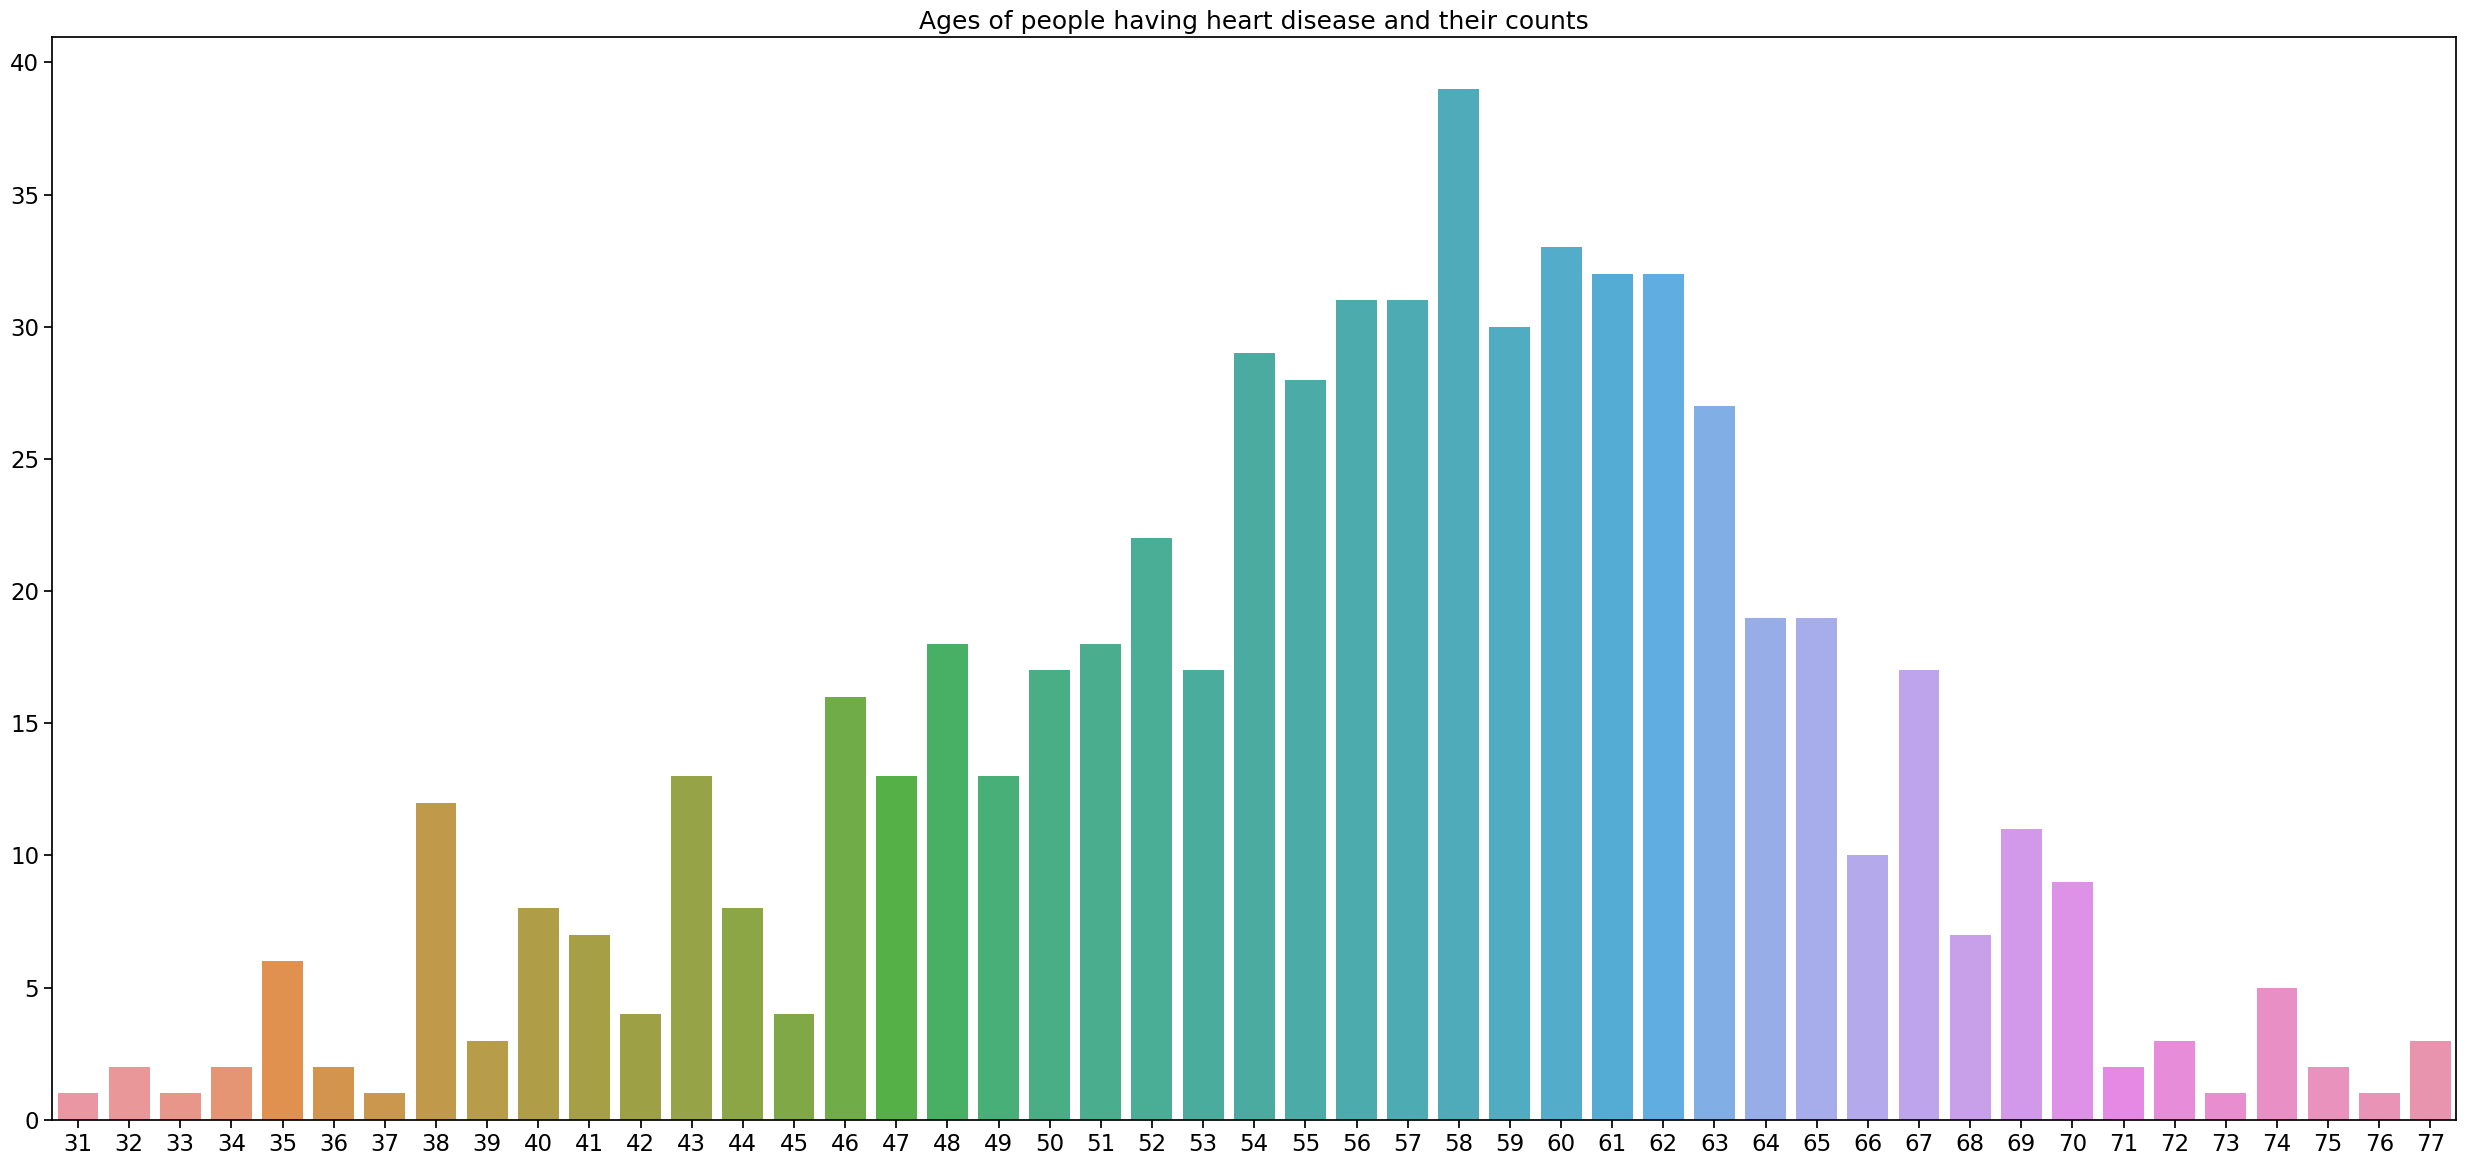

In [28]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=have_disease.age.value_counts().index,y=have_disease.age.value_counts().values)
plt.title("Ages of people having heart disease and their counts")
plt.tight_layout()

### Sex analysis

In [44]:
cond0=data["sex"]==0
cond1=data["sex"]==1
condhd0=have_disease["sex"]==0
condhd1=have_disease["sex"]==1
f_count=len(data[cond0])
m_count=len(data[cond1])
hdf_count=len(have_disease[condhd0])
hdm_count=len(have_disease[condhd1])
print('Female Count (All):',f_count)
print('Male Count (All):',m_count)
print('Female Count (Have Disease):',hdf_count)
print('Male Count (Have Disease):',hdm_count)

Female Count (All): 281
Male Count (All): 909
Female Count (Have Disease): 70
Male Count (Have Disease): 559


Text(0.5, 0, '0 = No heart Disease, 1 = Heart Disease')

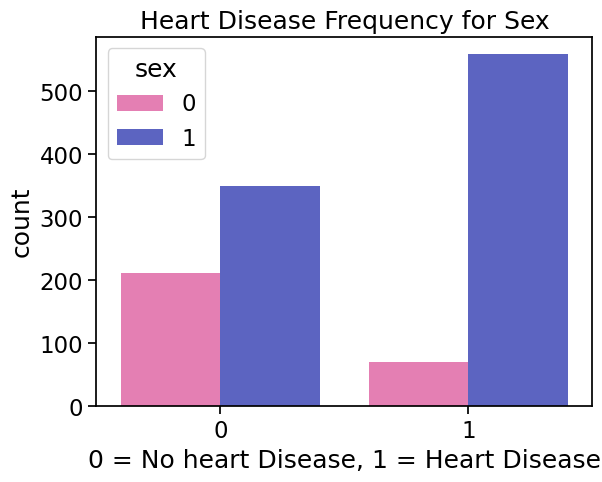

In [50]:
sns.countplot(x = 'target', data = data, hue = 'sex', palette=['#F56EB3',"#4B56D2"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No heart Disease, 1 = Heart Disease")

### Chest pain type analysis

Text(0.5, 0, 'Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic')

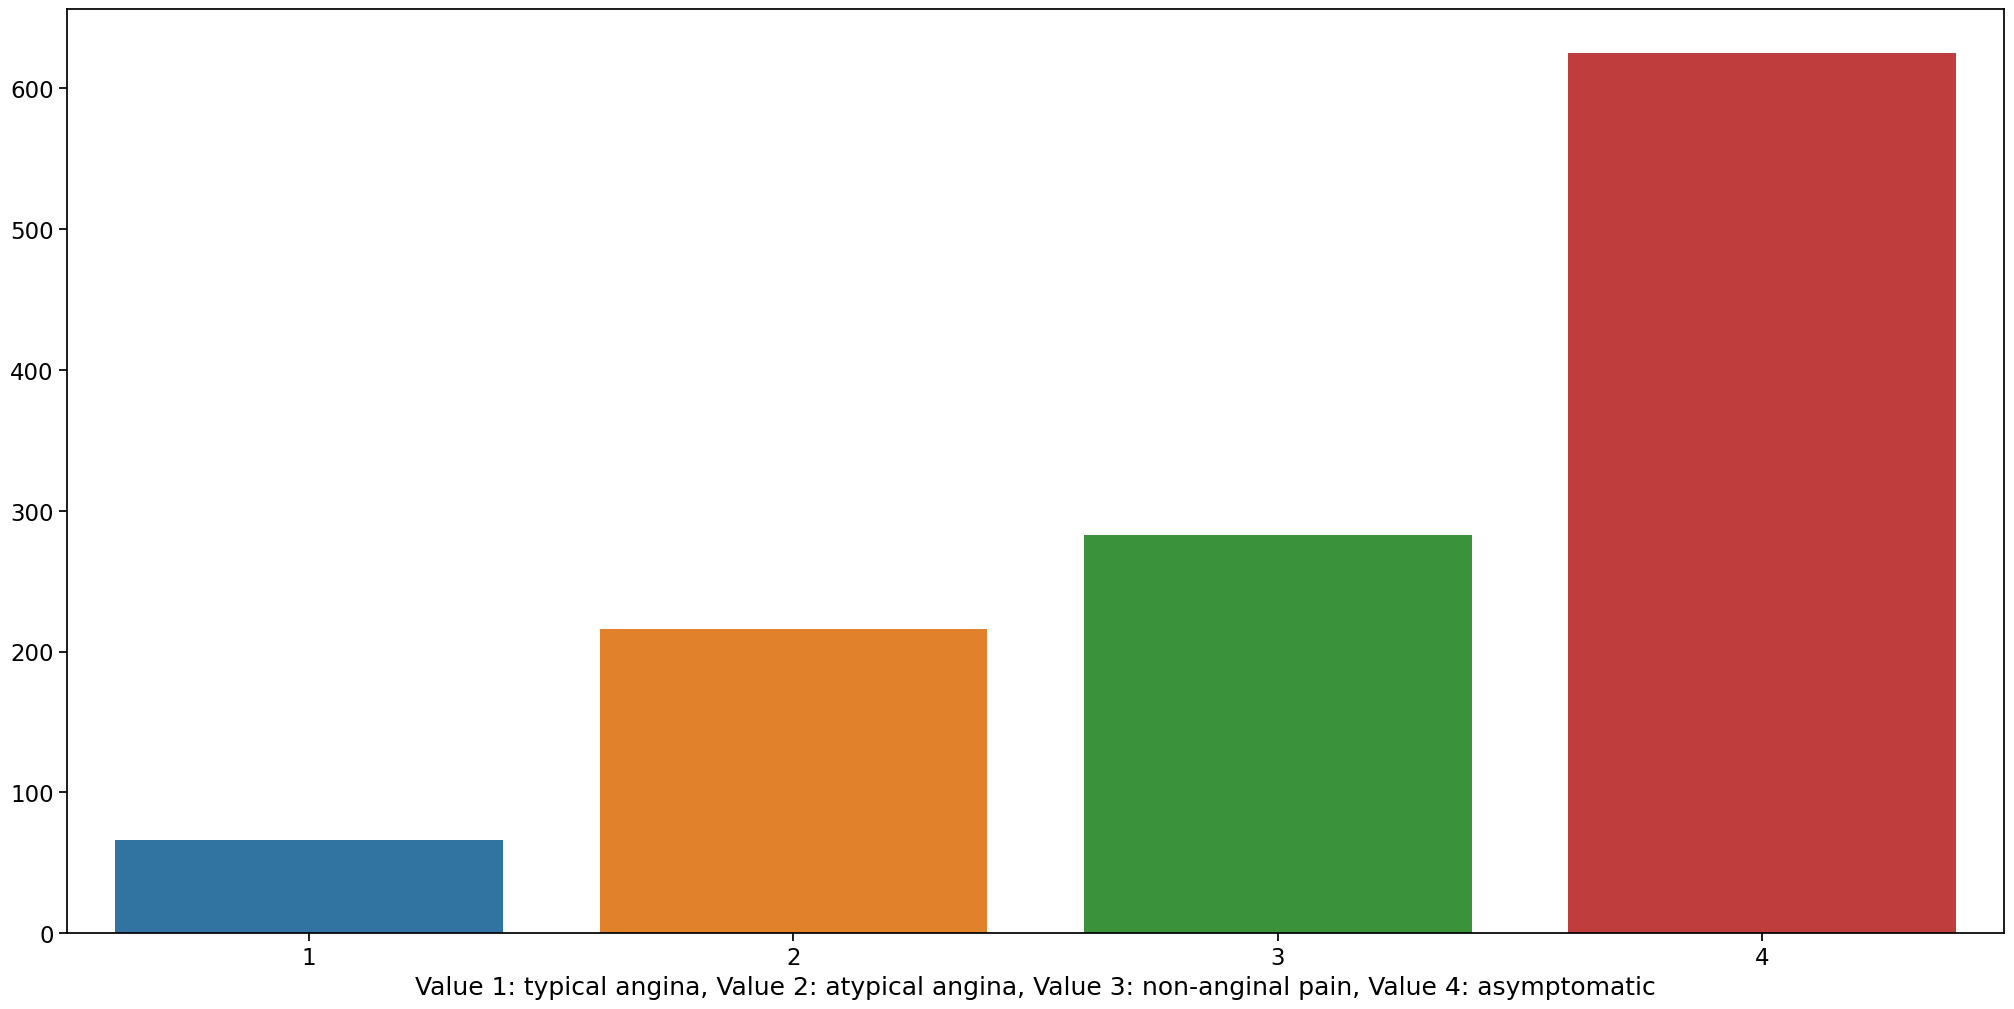

In [57]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data["chest pain type"].value_counts().index,y=data["chest pain type"].value_counts().values)
plt.xlabel("Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic")

Text(0.5, 0, 'Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic')

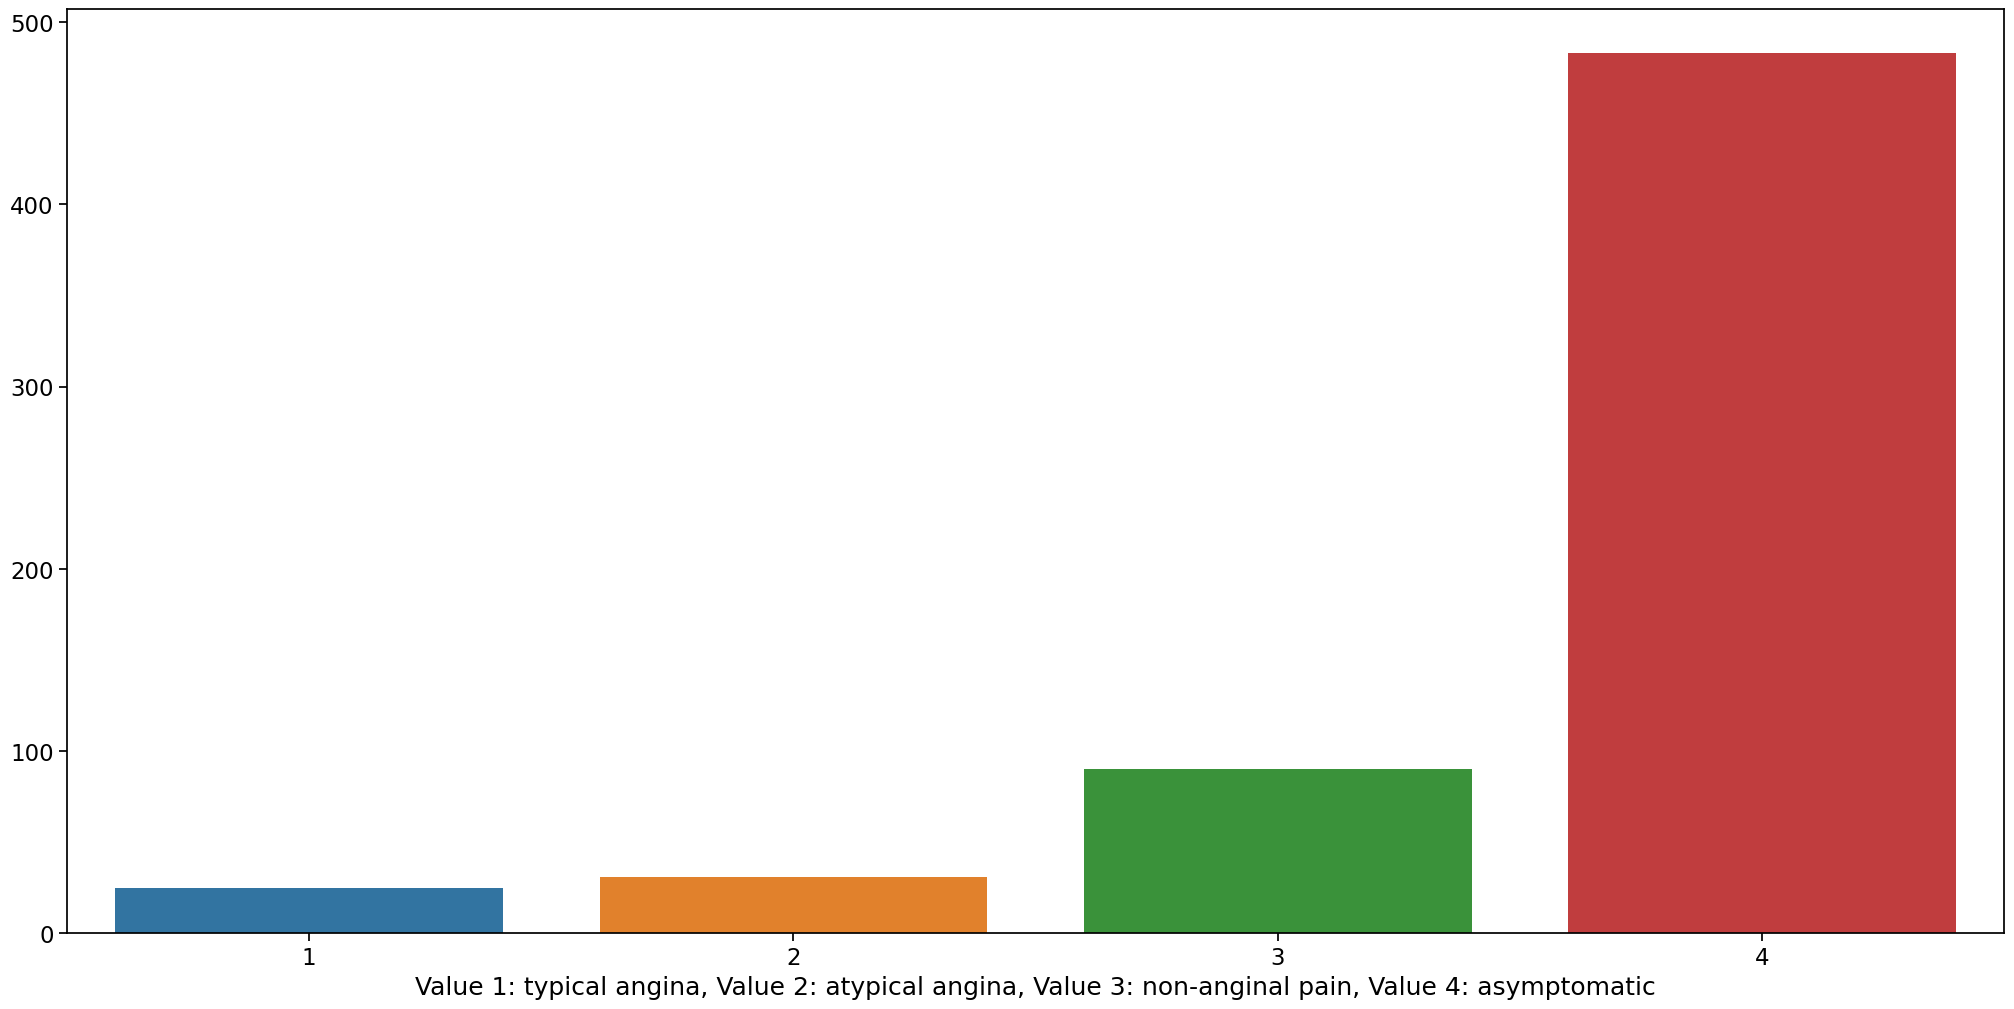

In [58]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=have_disease["chest pain type"].value_counts().index,y=have_disease["chest pain type"].value_counts().values)
plt.xlabel("Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic")

Text(0.5, 0, 'Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic')

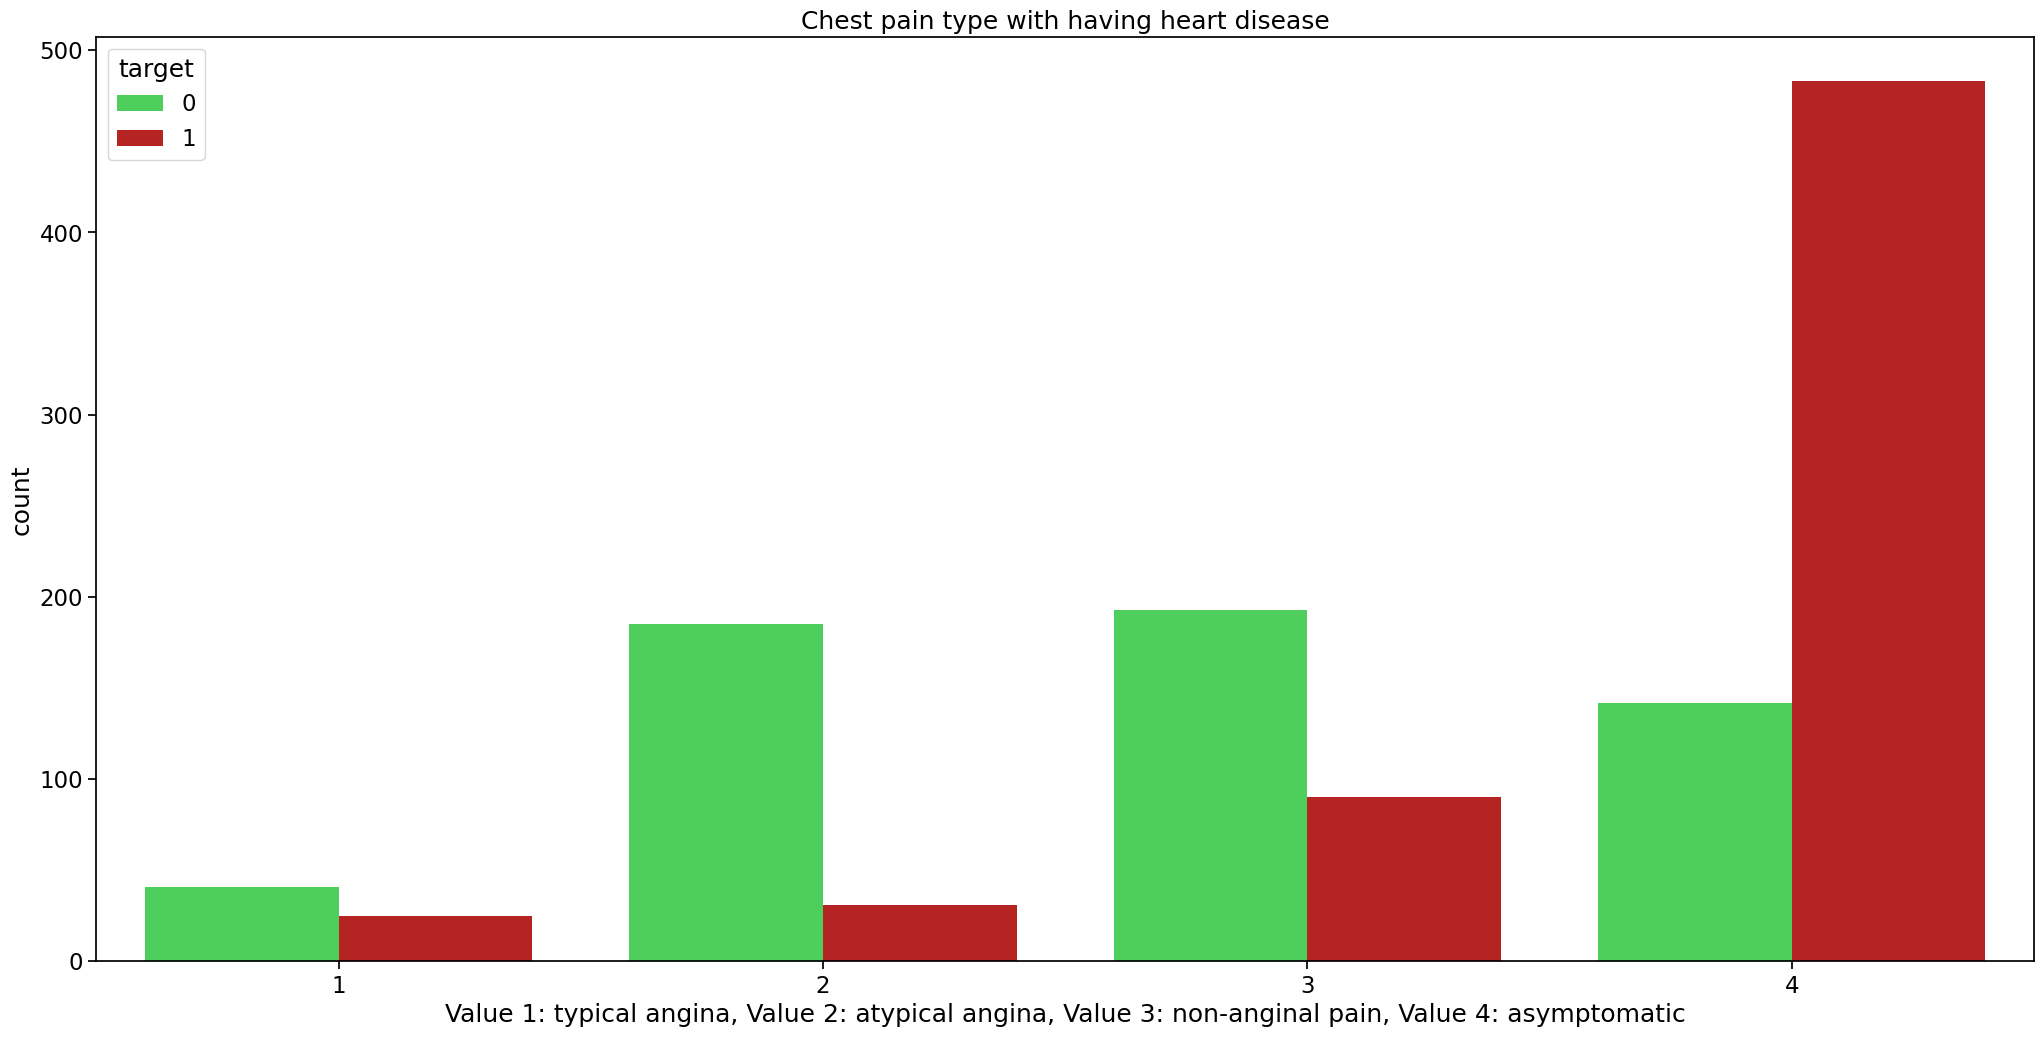

In [62]:
plt.figure(figsize=(25,12))
sns.countplot(x = 'chest pain type', data = data, hue = 'target', palette=['#38E54D',"#CF0A0A"])
plt.title("Chest pain type with having heart disease")
plt.xlabel("Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic")

We can say that having a asymptomatic chest pain type significantly effecs suffering from heart disease